<a href="https://colab.research.google.com/github/tvs-dk/logging-lab-scales/blob/main/Cleaning_noisy_scatterplots_timestamps_simplyfied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert timestamp to minutes and plot rolling average of data

This script imports all txt files in the current directory and converts data from the following format:

```
'%Y-%m-%d_%H-%M-%S' data data
```
to a dataframe where the time axis is in minutes, and only one of the data columns are used data[1] or data[2] (here, data[1]):
```
time   data[1]
0      data
1      data
2      data
```
It then calculates a rolling average (10 point) and mask all data points that are more than 10% below the rolling average.
* This is done because the lab scales often gives bad data points that have a lower value than the "real" data.

## Data plot:
* The data from all txt files are plottet in a line plot (can be changed to scatterplot).
* The order of the figure legend can be changed in this line in the block below:
```python
legend_order = ['dataset1.txt', 'dataset2.txt', 'dataset3.txt', 'dataset4.txt']

```

# Run this block to upload the data files

In [1]:
from google.colab import files
uploaded = files.upload()

Saving results_scale1-0mM.txt to results_scale1-0mM.txt
Saving results_scale2-10mM.txt to results_scale2-10mM.txt
Saving results_scale3-25mM.txt to results_scale3-25mM.txt
Saving results_scale4-50mM.txt to results_scale4-50mM.txt


# Run this block to run the script

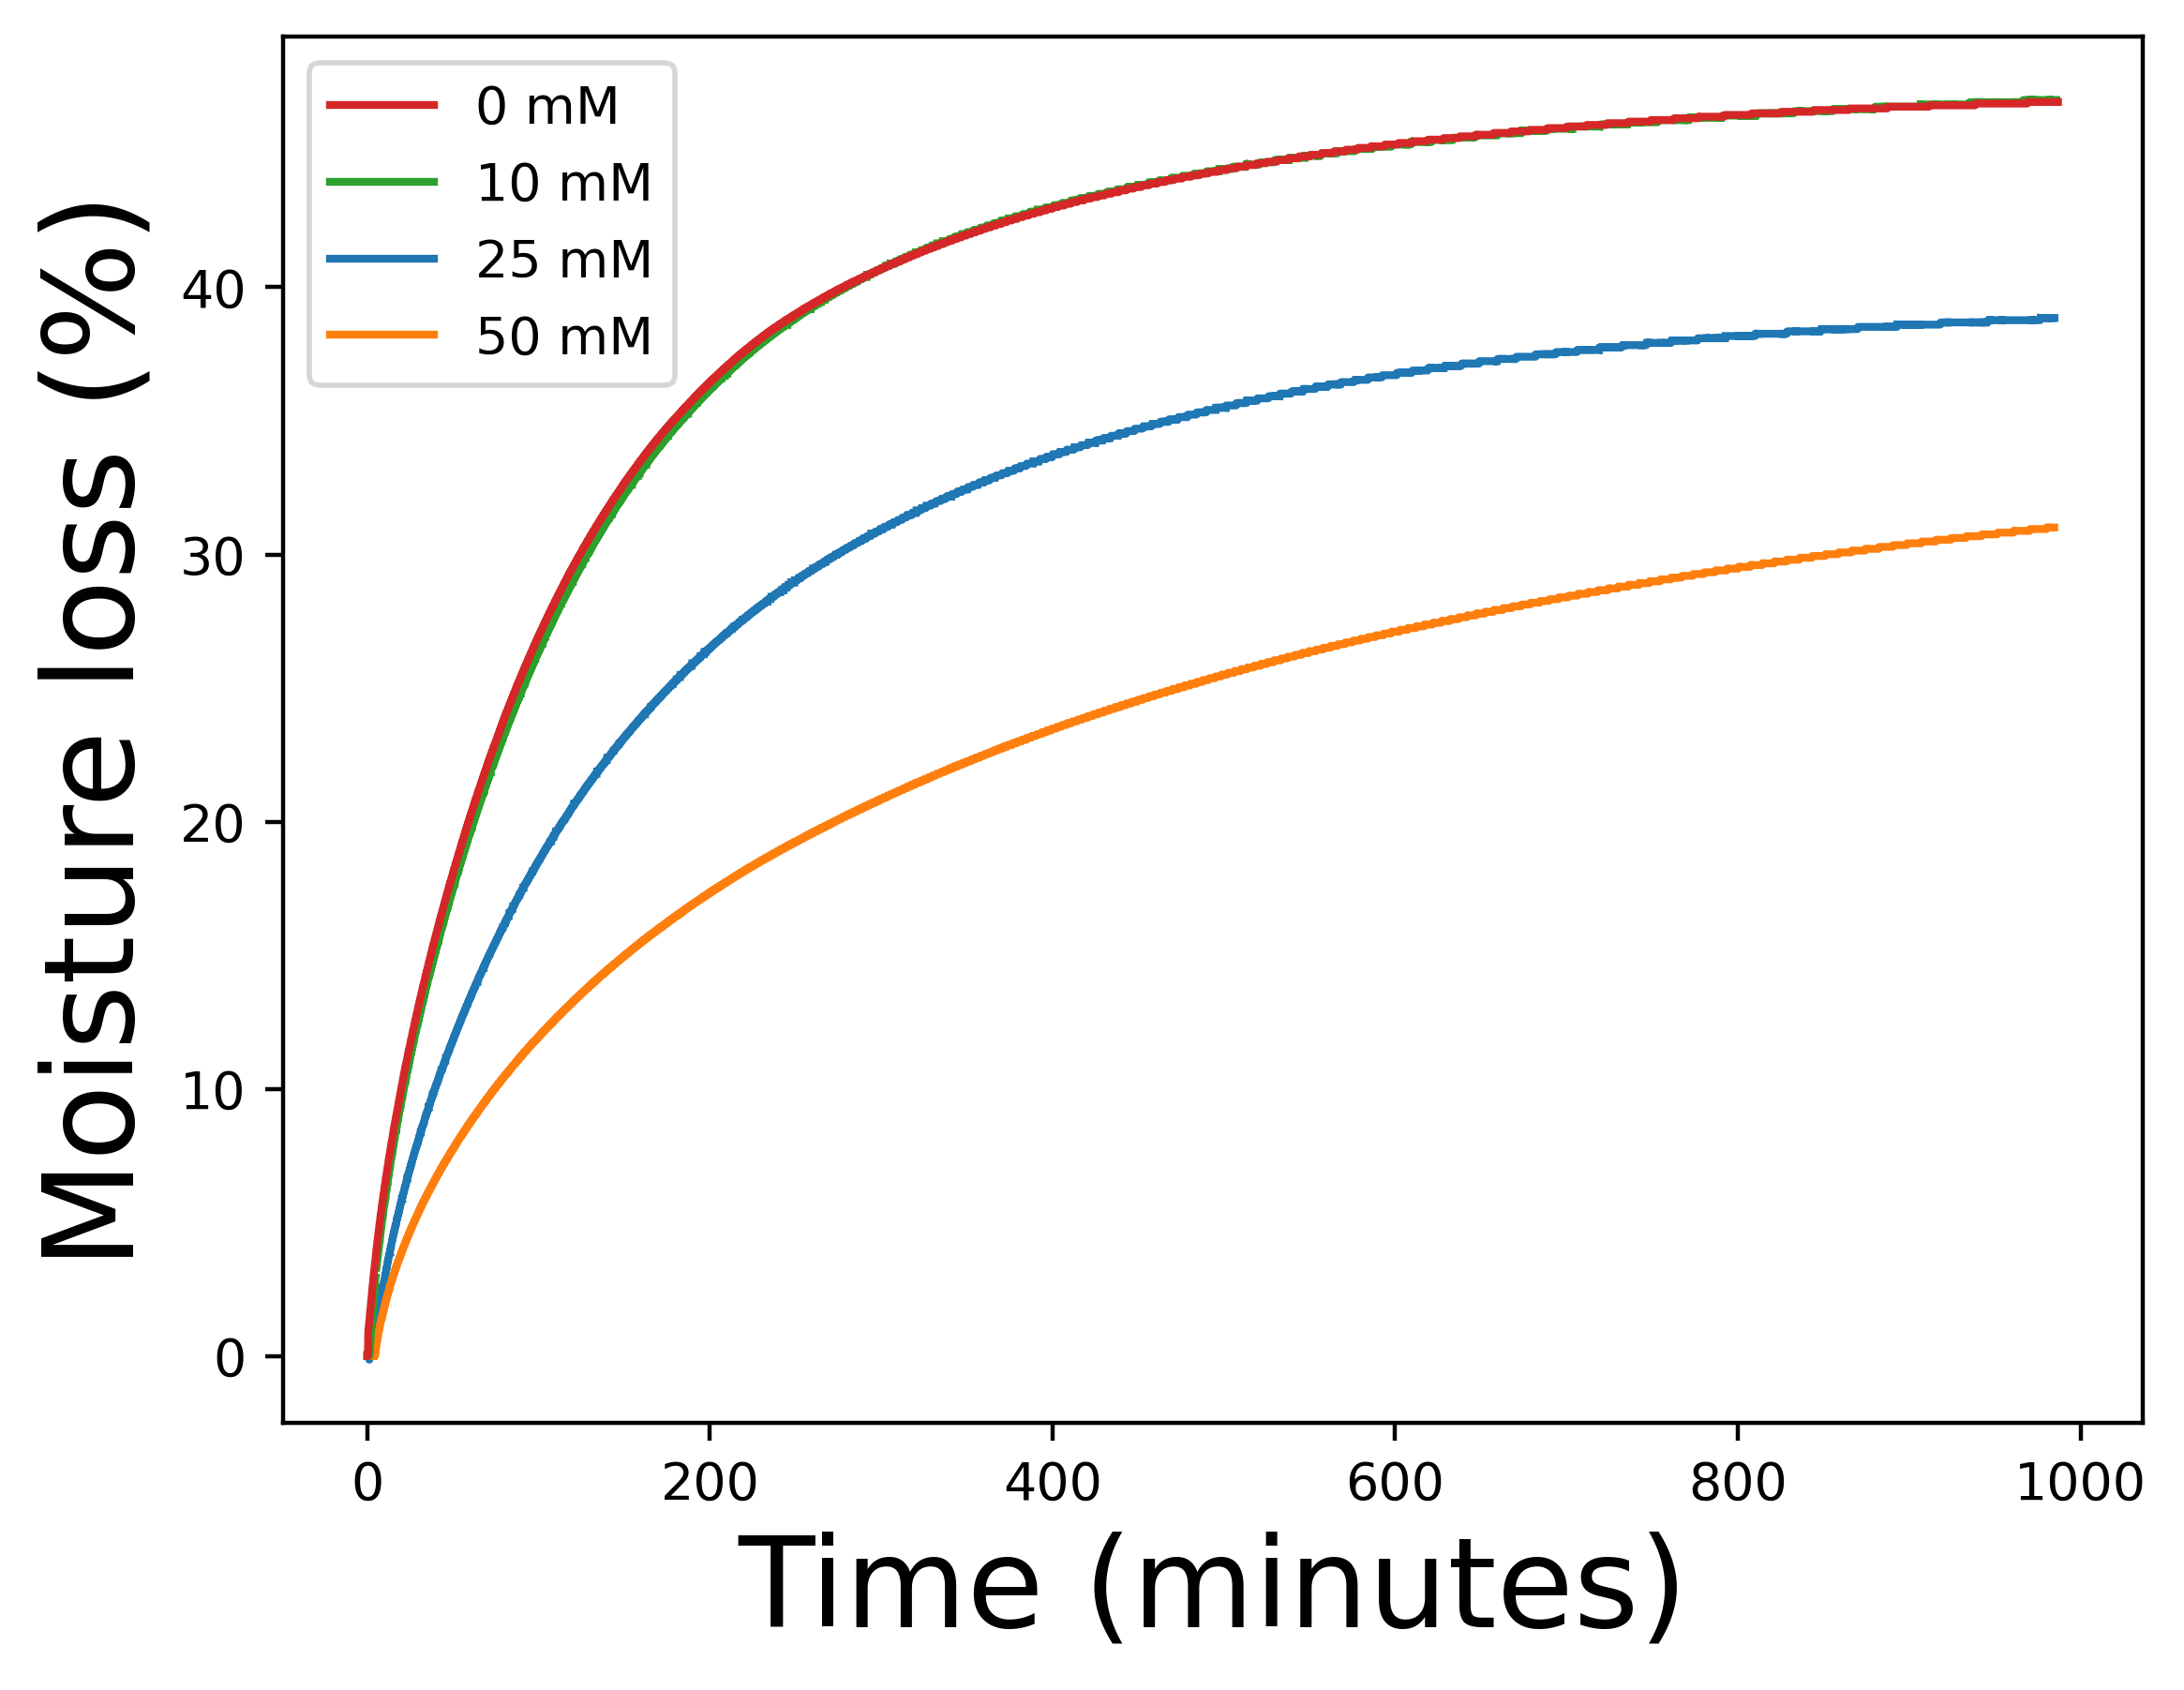

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


# Get all txt files in current directory
txt_files = glob.glob('*.txt')

# Define the order you want the datasets to appear in the legend
legend_order = ['results_scale1-0mM.txt', 'results_scale2-10mM.txt', 'results_scale3-25mM.txt', 'results_scale4-50mM.txt']

# Define the labels for each file
legend_labels = {'results_scale1-0mM.txt': '0 mM',
                 'results_scale2-10mM.txt': '10 mM',
                 'results_scale3-25mM.txt': '25 mM',
                 'results_scale4-50mM.txt': '50 mM'}

# Initialize plot
fig, ax = plt.subplots()

# Initialize dictionary to store lines for legend
legend_lines = {}

# Loop over txt files and plot each dataset
for file in txt_files:
    # Read in the data
    data = pd.read_csv(file, sep='\s+', header=None)

    # Convert first column to datetime and set as index
    data[0] = pd.to_datetime(data[0], format='%Y-%m-%d_%H-%M-%S')
    data.set_index(0, inplace=True)

    # Compute rolling average over 10 points
    rolling_avg = data.rolling(window=10).mean()

    # Mask any data point more than 10% below the rolling average
    mask = data < (0.9 * rolling_avg)
    data[mask] = np.nan

    # Convert time index to minutes
    data.index = (data.index - data.index[0]).total_seconds() / 60

    # Plot the data and store line for legend
    line, = ax.plot(data.index, data[2])
    label = legend_labels.get(file, None) # Get the label for the file from the dictionary
    legend_lines[file] = line



# Use this to improve image qualitiy. From here: https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/

plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

# Add labels to the x and y axes with different font sizes
plt.xlabel('X-axis label', fontsize=24)
plt.ylabel('Y-axis label', fontsize=24)

# Add a legend with a different font size
plt.legend(fontsize=18)

# Create legend in specified order
handles = [legend_lines[file] for file in legend_order]
labels = [legend_labels.get(file, None) for file in legend_order]
ax.legend(handles, labels)


# Set axis labels
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Moisture loss (%)')

# Show the plot
plt.show()
